In [1]:
import pyarrow.feather as feather
import pandas as pd
# 设置 Pandas 显示选项
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', 200)       # 设置显示宽度，防止换行
pd.set_option('display.max_rows', 20)      # 只显示 20 行数据（可根据需要调整）
# 文件路径
file_path = "/mnt/nvme2/yyc/medical-coding/files/data/mimiciii_full/mimiciii_full.feather"
# 读取 feather 文件
data = feather.read_table(file_path)
# 转换为 pandas DataFrame
df = data.to_pandas()
# 打印数据框
print(df)

       subject_id     _id      DESCRIPTION                                               text                                             cpt_id                                          icd9_diag  \
0               3  145834           Report  admission date discharge date date of birth se...                                     [94002, 94003]  [785.59, 682.6, 425.4, 410.71, 038.9, 584.9, 4...   
1               4  185777           Report  admission date discharge date date of birth se...                [99233, 99223, 99238, 99231, 99232]  [E931.7, 799.4, 041.11, 136.3, 571.5, 790.7, 2...   
2               6  107064           Report  admission date discharge date date of birth se...         [99239, 99255, 99291, 99233, 99231, 99232]  [403.91, 276.6, 444.0, V15.82, 997.2, 276.7, 2...   
3               9  150750  Report+Addendum  admission date discharge date date of birth se...                                            [94003]           [276.5, 584.9, 431, 507.0, 401.9, 428.0]   
4    

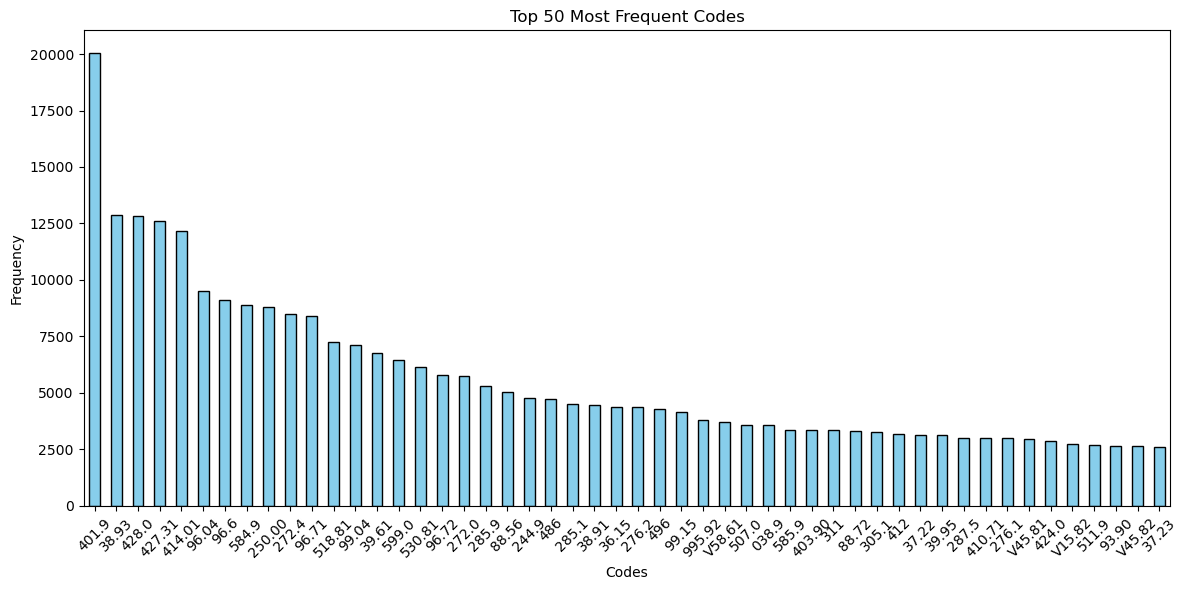

In [2]:
import matplotlib.pyplot as plt

icd9_diag = df['icd9_diag'].explode()  # 展开列表中的每个元素为独立行
icd9_proc = df['icd9_proc'].explode()  # 同上

# 合并所有编码列
all_codes = pd.concat([icd9_diag, icd9_proc])

# 统计出现频率
code_frequencies = all_codes.value_counts()

# 可视化前 50 个最常见的编码
top_20_codes = code_frequencies.head(50)

# 绘制柱状图
plt.figure(figsize=(12, 6))
top_20_codes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 50 Most Frequent Codes')
plt.xlabel('Codes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
# 统计出现频率小于 10 的编码数量
low_frequency_codes = code_frequencies[code_frequencies < 2]
num_low_frequency_codes = len(low_frequency_codes)

# 打印结果
print(f"Number of codes with frequency less than 2: {num_low_frequency_codes}")

Number of codes with frequency less than 2: 1921


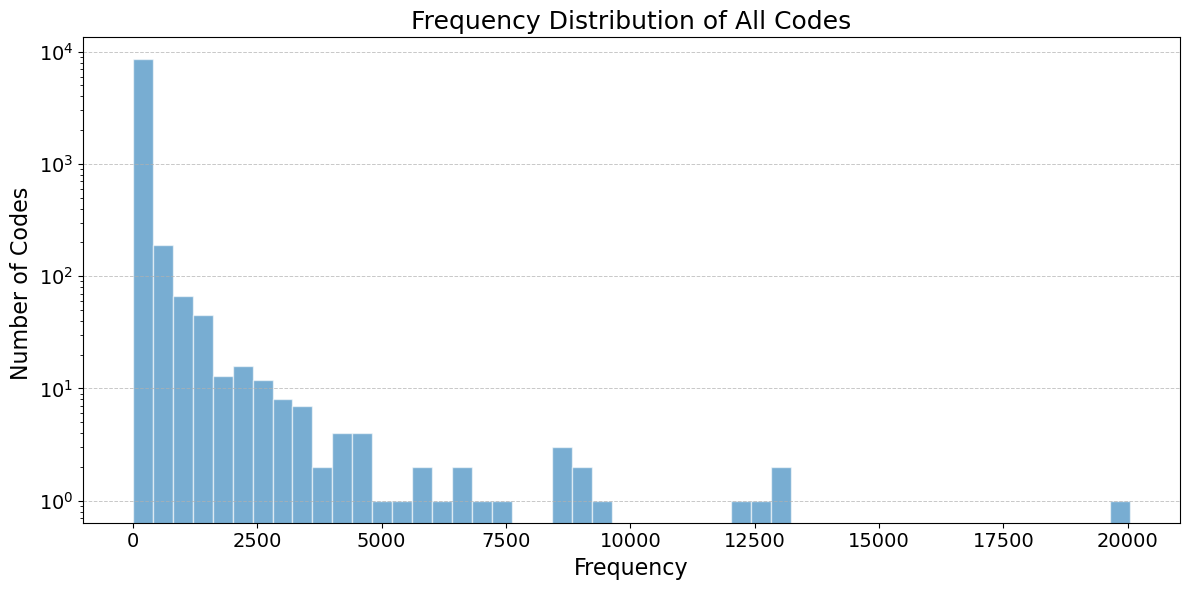

In [18]:
# 可视化所有编码的频率分布
plt.figure(figsize=(12, 6))

# 绘制直方图，调整颜色、透明度和边框
plt.hist(code_frequencies, bins=50, alpha=0.6, edgecolor='white', log=True)

# 添加标题和坐标轴标签，调整字体大小
plt.title('Frequency Distribution of All Codes', fontsize=18)  # 增大标题字体并加粗
plt.xlabel('Frequency', fontsize=16)  # 增大X轴标签字体
plt.ylabel('Number of Codes ', fontsize=16)  # 增大Y轴标签字体

# 调整坐标轴刻度字体大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 添加网格线
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # 添加水平网格线

# 自动调整布局避免重叠
plt.tight_layout()

# 显示图形
plt.show()

In [5]:
# 计算编码频率的分位数
quantiles = code_frequencies.quantile([0.25, 0.5, 0.75])

# 打印结果
print("Quantiles of Code Frequencies:")
print(quantiles)

Quantiles of Code Frequencies:
0.25     2.0
0.50     6.0
0.75    28.0
Name: count, dtype: float64


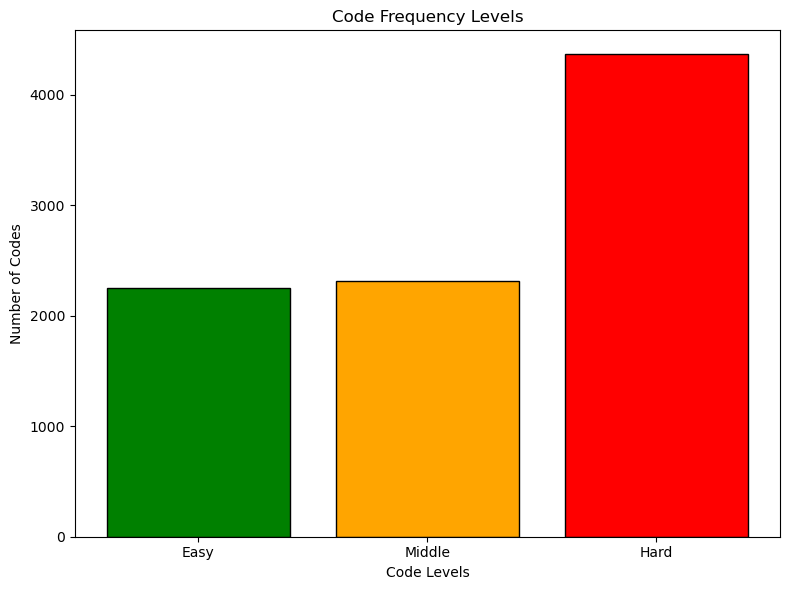

In [6]:
# 分级
easy_codes = code_frequencies[code_frequencies >= 28]
middle_codes = code_frequencies[(code_frequencies >= 6) & (code_frequencies < 28)]
hard_codes = code_frequencies[code_frequencies < 6]

# 统计各级别数量
categories = ['Easy', 'Middle', 'Hard']
counts = [len(easy_codes), len(middle_codes), len(hard_codes)]

# 可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['green', 'orange', 'red'], edgecolor='black')
plt.title('Code Frequency Levels')
plt.xlabel('Code Levels')
plt.ylabel('Number of Codes')
plt.tight_layout()
plt.show()

In [7]:
# 定义函数计算每个样本中 target 编码的平均频率
def calculate_average_frequency(targets):
    frequencies = [code_frequencies[code] for code in targets if code in code_frequencies]
    return sum(frequencies) / len(frequencies) if frequencies else 0

df['avg_code_frequency'] = df['target'].apply(calculate_average_frequency)

# 加权平均频率，使低频编码的权重更高
def calculate_weighted_frequency(targets):
    frequencies = [code_frequencies[code] for code in targets if code in code_frequencies]
    if not frequencies:
        return 0
    # 计算加权平均频率，权重为 1/frequency
    weights = [1 / freq for freq in frequencies]
    weighted_sum = sum(freq * weight for freq, weight in zip(frequencies, weights))
    return weighted_sum / sum(weights)

df['weighted_avg_frequency'] = df['target'].apply(calculate_weighted_frequency)

#使用最低频率的编码
def calculate_min_frequency(targets):
    frequencies = [code_frequencies[code] for code in targets if code in code_frequencies]
    return min(frequencies) if frequencies else 0

df['min_code_frequency'] = df['target'].apply(calculate_min_frequency)

In [8]:
print(df)

       subject_id     _id      DESCRIPTION                                               text                                             cpt_id                                          icd9_diag  \
0               3  145834           Report  admission date discharge date date of birth se...                                     [94002, 94003]  [785.59, 682.6, 425.4, 410.71, 038.9, 584.9, 4...   
1               4  185777           Report  admission date discharge date date of birth se...                [99233, 99223, 99238, 99231, 99232]  [E931.7, 799.4, 041.11, 136.3, 571.5, 790.7, 2...   
2               6  107064           Report  admission date discharge date date of birth se...         [99239, 99255, 99291, 99233, 99231, 99232]  [403.91, 276.6, 444.0, V15.82, 997.2, 276.7, 2...   
3               9  150750  Report+Addendum  admission date discharge date date of birth se...                                            [94003]           [276.5, 584.9, 431, 507.0, 401.9, 428.0]   
4    

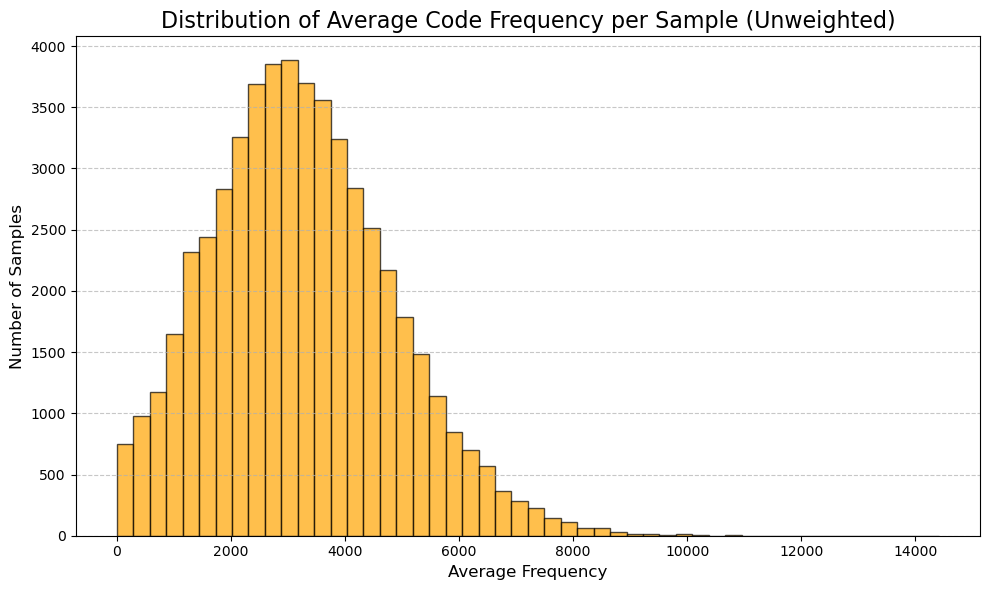

In [9]:
# 可视化不加权的平均频率分布
plt.figure(figsize=(10, 6))
plt.hist(df['avg_code_frequency'], bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Code Frequency per Sample (Unweighted)', fontsize=16)
plt.xlabel('Average Frequency', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

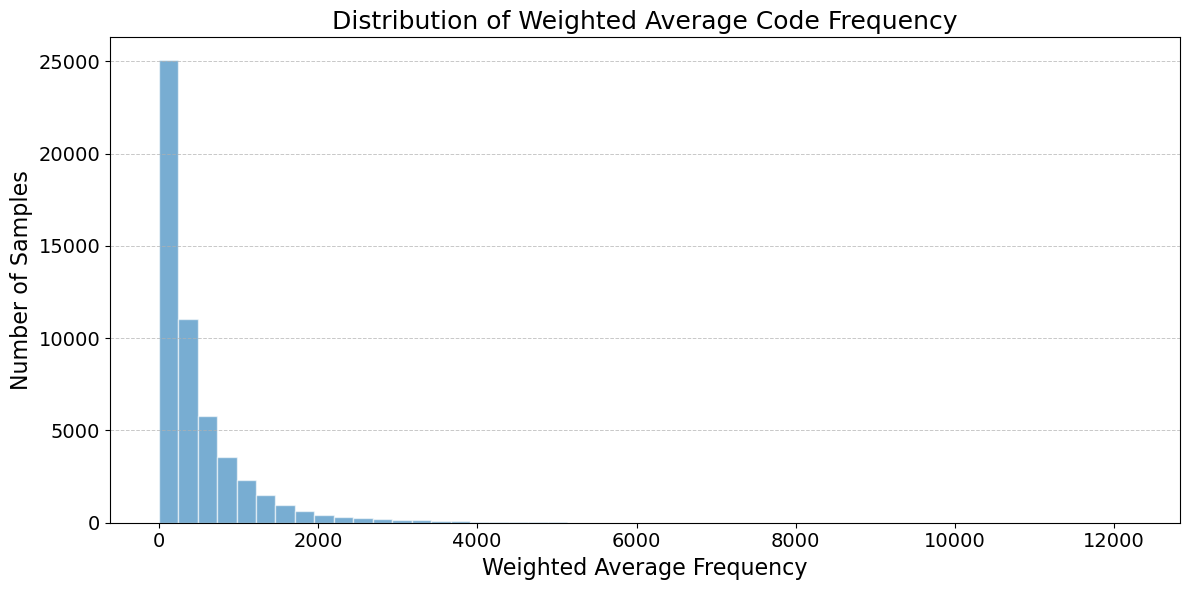

In [17]:
import matplotlib.ticker as ticker
import numpy as np
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制直方图，调整颜色、透明度和边框
plt.hist(df['weighted_avg_frequency'], bins=50,edgecolor='white', alpha=0.6)

# 添加标题和坐标轴标签，调整字体大小
plt.title('Distribution of Weighted Average Code Frequency', fontsize=18)  
plt.xlabel('Weighted Average Frequency', fontsize=16)  # X轴标签字体
plt.ylabel('Number of Samples', fontsize=16)  # Y轴标签字体

# 调整刻度字体大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 添加网格线
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# 自动调整布局避免重叠
plt.tight_layout()

# 显示图形
plt.show()

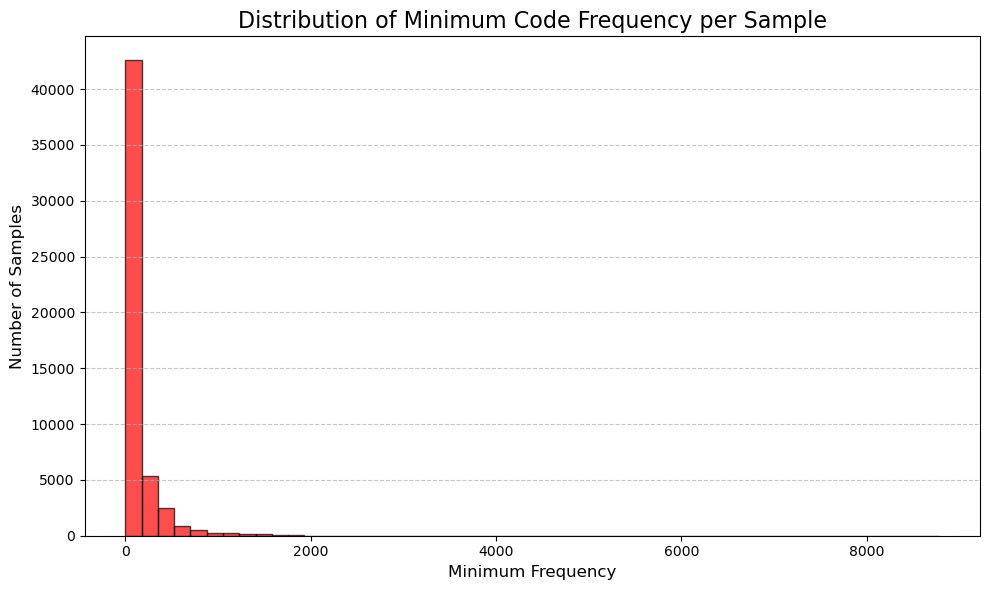

In [12]:
# 最低频率分布
plt.figure(figsize=(10, 6))
plt.hist(df['min_code_frequency'], bins=50, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribution of Minimum Code Frequency per Sample', fontsize=16)
plt.xlabel('Minimum Frequency', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

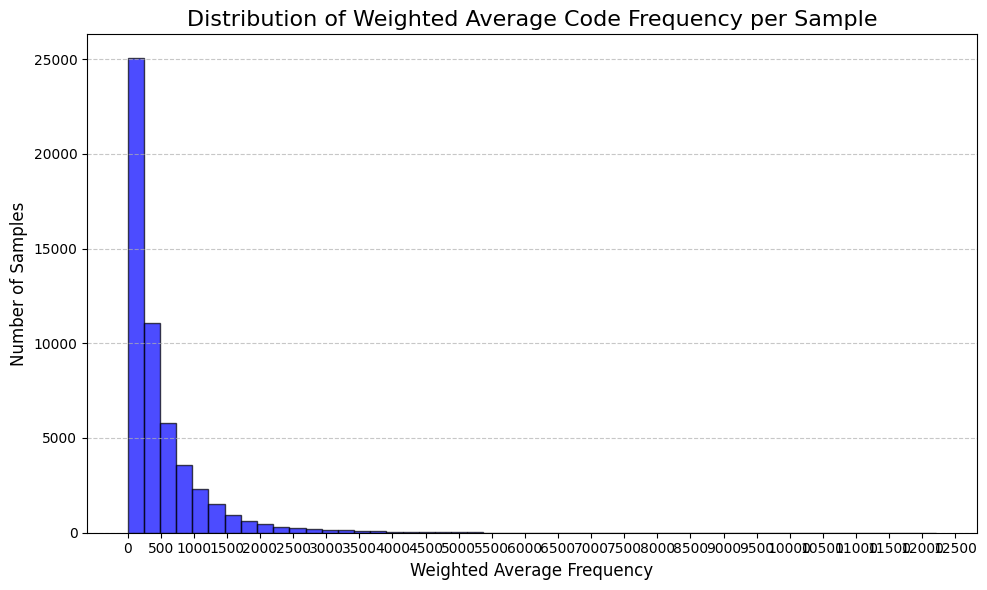

In [65]:
import matplotlib.pyplot as plt

# 画直方图
plt.figure(figsize=(10, 6))
plt.hist(df['weighted_avg_frequency'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Weighted Average Code Frequency per Sample', fontsize=16)
plt.xlabel('Weighted Average Frequency', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 获取最小值和最大值并确保它们是整数
max_x = int(np.ceil(df['weighted_avg_frequency'].max()))  # 最大值向上取整
min_x = int(np.floor(df['weighted_avg_frequency'].min()))  # 最小值向下取整

xticks = range(min_x - (min_x % 500), max_x + 500, 500)  # 设置每500一个刻度
plt.xticks(xticks)

plt.tight_layout()
plt.show()

In [66]:
import pandas as pd

# 假设 df 是你的原始 DataFrame

# 根据 'weighted_avg_frequency' 列进行划分
def assign_difficulty(row):
    if row['weighted_avg_frequency'] > 250:
        return 'easy'
    elif 50 <= row['weighted_avg_frequency'] <= 250:
        return 'middle'
    else:
        return 'hard'

# 创建新的 'difficulty' 列
df['difficulty'] = df.apply(assign_difficulty, axis=1)
print(df)
# 保存为新文件
output_path = "/mnt/nvme2/yyc/medical-coding/files/data/mimiciii_full/mimiciii_full_difficulty_from_frequency.feather"
df.to_feather(output_path)

       subject_id     _id      DESCRIPTION                                               text                                             cpt_id                                          icd9_diag  \
0               3  145834           Report  admission date discharge date date of birth se...                                     [94003, 94002]  [263.9, 428.0, 425.4, 682.6, 410.71, 785.59, 0...   
1               4  185777           Report  admission date discharge date date of birth se...                [99231, 99238, 99232, 99233, 99223]  [042, V09.0, E931.7, 041.11, 571.5, 276.3, 136...   
2               6  107064           Report  admission date discharge date date of birth se...         [99231, 99239, 99291, 99232, 99233, 99255]  [276.6, 997.2, 285.9, V15.82, 275.3, 444.0, 40...   
3               9  150750  Report+Addendum  admission date discharge date date of birth se...                                            [94003]           [428.0, 401.9, 276.5, 507.0, 431, 584.9]   
4    

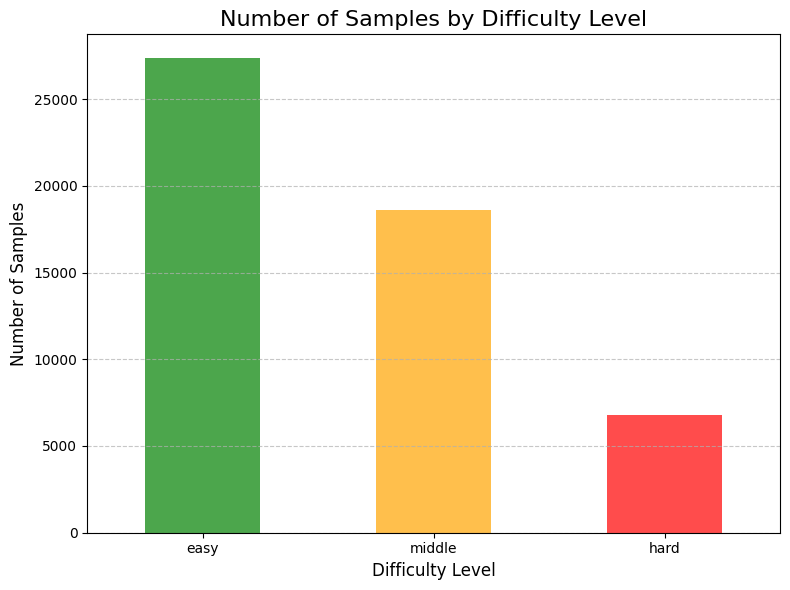

In [67]:
import matplotlib.pyplot as plt

# 确保按照 easy, middle, hard 的顺序排列
difficulty_order = ['easy', 'middle', 'hard']
difficulty_counts = df['difficulty'].value_counts().reindex(difficulty_order)

# 绘制柱状图可视化
plt.figure(figsize=(8, 6))
difficulty_counts.plot(kind='bar', color=['green', 'orange', 'red'], alpha=0.7)
plt.title('Number of Samples by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()